In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


(1143, 13)


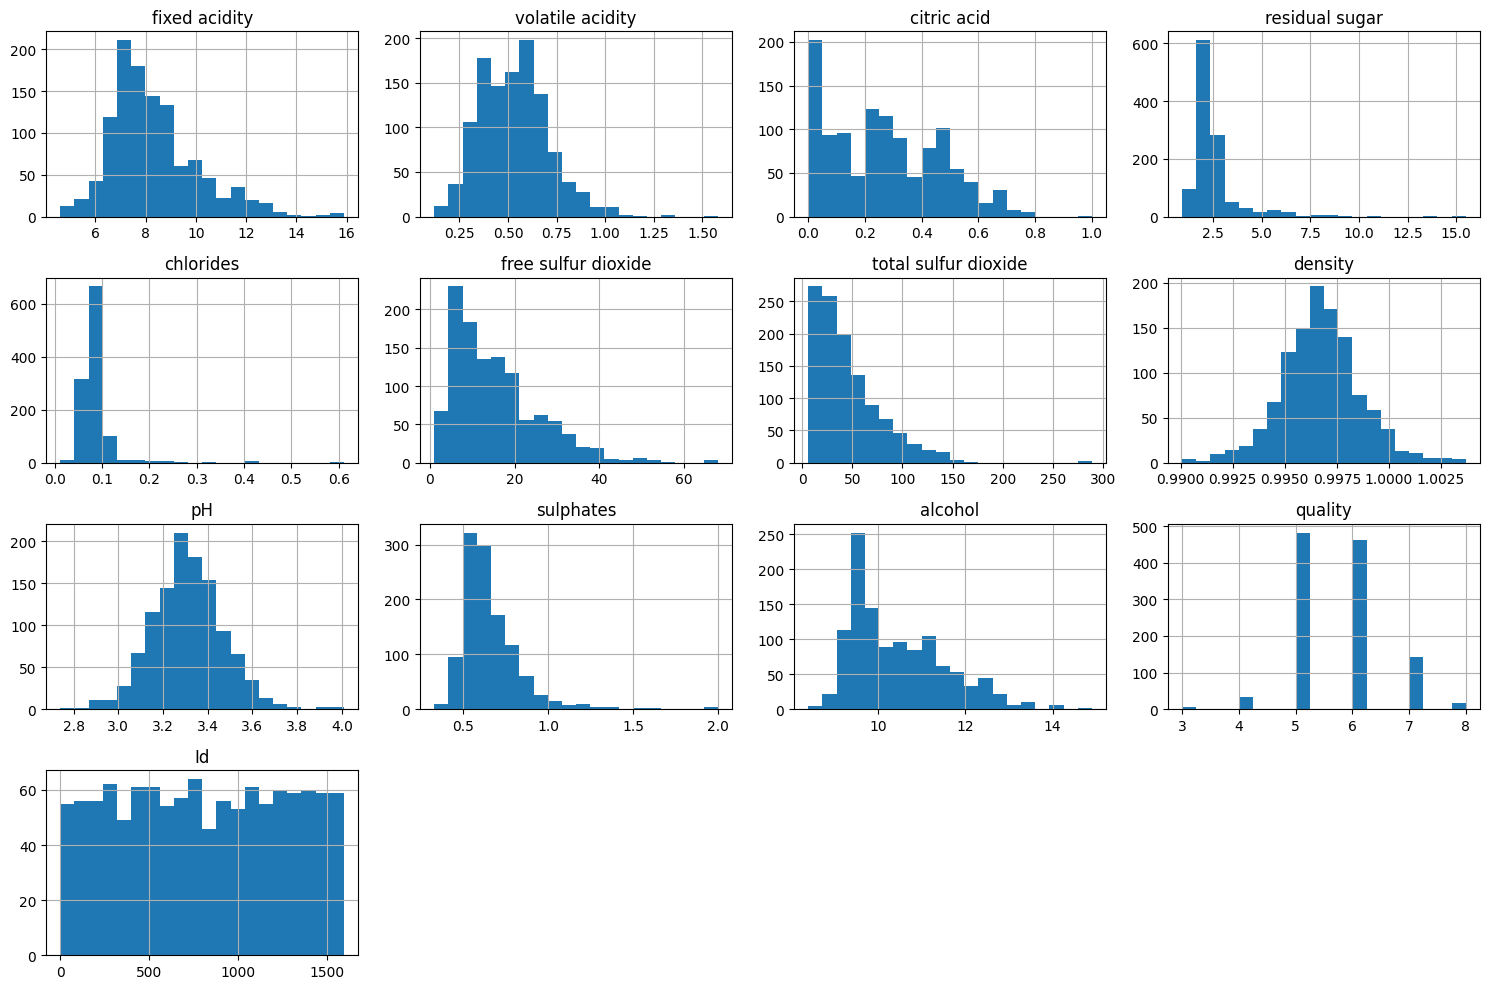

                            mean  standard_deviation         max      min
fixed acidity           8.311111            1.746830    15.90000  4.60000
volatile acidity        0.531339            0.179555     1.58000  0.12000
citric acid             0.268364            0.196600     1.00000  0.00000
residual sugar          2.532152            1.355324    15.50000  0.90000
chlorides               0.086933            0.047247     0.61100  0.01200
free sulfur dioxide    15.615486           10.246001    68.00000  1.00000
total sulfur dioxide   45.914698           32.767787   289.00000  6.00000
density                 0.996730            0.001924     1.00369  0.99007
pH                      3.311015            0.156596     4.01000  2.74000
sulphates               0.657708            0.170324     2.00000  0.33000
alcohol                10.442111            1.081722    14.90000  8.40000
quality                 5.657043            0.805472     8.00000  3.00000
Id                    804.969379      

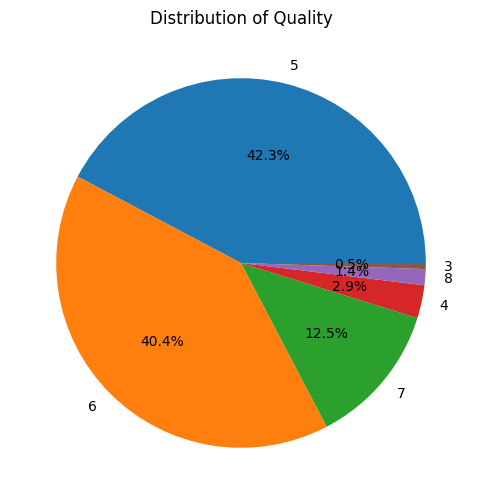

In [85]:
data = pd.read_csv('WineQT.csv')
# print(data)
print(data.shape)
# Describe the dataset
description = data.describe()

# Draw a histogram for each attribute
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()
# fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
tuples = []
for column in data.columns:
    column_data = data[column]
    mean = np.mean(column_data)
    min = np.min(column_data)
    max = np.max(column_data)
    standard_deviation = np.std(column_data)
    tuples.append((mean,standard_deviation,max,min))

# df_metrics = pd.DataFrame(tuples,columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality','Id'])
df_metrics = pd.DataFrame(tuples, columns=['mean', 'standard_deviation', 'max', 'min'], index=data.columns)
print(df_metrics)
# Draw a pie chart for the 'quality' attribute
quality_counts = data['quality'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Quality')
plt.show()


In [86]:
X = data.drop(['quality'], axis=1)  # Remove 'quality' and 'Id' columns from features
y = data['quality']  # Target variable
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize and standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

min_max_scaler = MinMaxScaler()
X_train_norm = min_max_scaler.fit_transform(X_train)
X_val_norm = min_max_scaler.transform(X_val)
X_test_norm = min_max_scaler.transform(X_test)

# Multinomial Logistic Regression Class in Python from Scratch

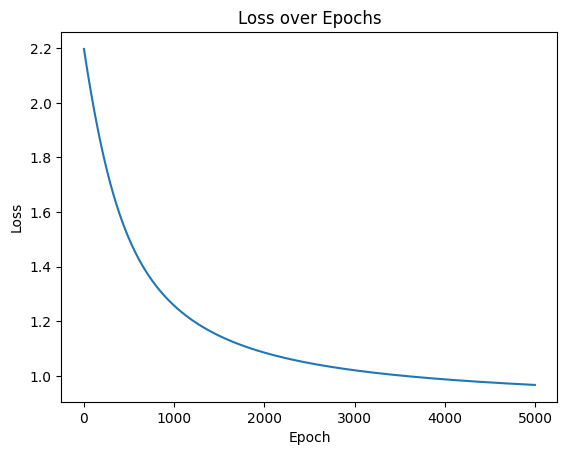

Validation Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.66      0.81      0.72        93
           6       0.62      0.65      0.63        97
           7       0.62      0.28      0.38        29
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.32      0.29      0.29       229
weighted avg       0.61      0.64      0.61       229

Validation Dataset
Validation Accuracy: 0.6376
------------------------------------
Training Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        19
           5       0.69      0.80      0.74       293
           6       0.58      0.64      0.61       272
           7       0.57      0.30      0.39        88
           8

In [89]:
import numpy as np
from sklearn.metrics import classification_report

class MultinomialLogisticRegression:
    def __init__(self, learning_rate=0.005, num_epochs=5000,num_classes=None):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None
        self.num_classes = num_classes
        self.loss_vector = []
    
    def softmax(self, z):
        return np.exp(z - np.max(z, axis=1, keepdims=True)) / np.exp(z - np.max(z, axis=1, keepdims=True)).sum(axis=1, keepdims=True)
    
    def cross_entropy_loss(self, y_true, y_pred):
        return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    
    def gradient_descent(self, X, y, y_pred):
        return (1 / X.shape[0]) * np.dot(X.T, (y_pred - y)), (1 / X.shape[0]) * np.sum(y_pred - y,axis=0,keepdims=True)
    
    def fit(self, X, y):
        num_features = X.shape[1]
        self.weights = np.zeros((num_features, self.num_classes+1))
        self.bias = np.zeros((1, self.num_classes+1))
        for epoch in range(self.num_epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.softmax(z)
            loss = self.cross_entropy_loss(self.one_hot_encode(y, self.num_classes), y_pred)
            self.loss_vector.append(loss)
            dw, db = self.gradient_descent(X, self.one_hot_encode(y, self.num_classes), y_pred)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.argmax(self.softmax(np.dot(X, self.weights) + self.bias), axis=1)
    
    def score(self, X, y):
        return np.mean(self.predict(X) == y)
    
    def one_hot_encode(self, y, num_classes):
        return np.eye(num_classes+1)[y]
    
    def plot_loss(self):
        plt.plot(self.loss_vector)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss over Epochs')
        plt.show()
    
    def set_learning_rate(self,learning_rate):
        self.learning_rate = learning_rate

    def set_epochs(self,num_epochs):
        self.num_epochs = num_epochs


model = MultinomialLogisticRegression(learning_rate=0.005, num_epochs=5000,num_classes=8)
model.fit(X_train_std, y_train)
model.plot_loss()
y_val_pred = model.predict(X_val_std)
print("Validation Report:")
print(classification_report(y_val, y_val_pred,zero_division=0))
print("Validation Dataset")
validation_accuracy = model.score(X_val_std, y_val)
print(f"Validation Accuracy: {validation_accuracy:.4f}")
print('------------------------------------')
y_train_pred = model.predict(X_train_std)
print("Training Report:")
print(classification_report(y_train, y_train_pred,zero_division=0))
print("Training Dataset")
training_accuracy =  model.score(X_train_std, y_train)
print(f"Training Accuracy: {training_accuracy:.4f}")


# Hyperparameter Tuning and Evaluation

In [92]:
import wandb
wandb.login()
wandb.init(project="multinomial-logistic-regression")

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


learning_rate,▁▁▁▄▄▄███
num_epochs,▁▃█▁▃█▁▃█
validation_accuracy,▁▁▃▃▄█▄██
learning_rate,0.01
num_epochs,5000
validation_accuracy,0.63755


In [96]:
learning_rates_list = [0.001, 0.005, 0.01]
num_epochs_list = [1000, 2000, 5000]
tuples = []
model = MultinomialLogisticRegression(learning_rate=0.005, num_epochs=5000,num_classes=8)
for learning_rate in learning_rates_list:
    for epochs in num_epochs_list:
        model.set_learning_rate(learning_rate)
        model.set_epochs(epochs)
        model.fit(X_train_std,y_train)
        validation_accuracy = model.score(X_val_std, y_val)
        wandb.log({"learning_rate": learning_rate, "num_epochs": epochs, "validation_accuracy": validation_accuracy})
        tuples.append((validation_accuracy,learning_rate,epochs))

sorted_tuples = sorted(tuples, key=lambda x: x[0], reverse=True)
df = pd.DataFrame(sorted_tuples, columns=['Accuracy', 'Learning Rate', 'Epochs'])
print(df.to_string(index=False))
best_learning_rate = sorted_tuples[0][1]
best_num_epochs = sorted_tuples[0][2]
model.set_learning_rate(best_learning_rate)
model.set_epochs(best_num_epochs)
model.fit(X_train_std,y_train)
y_test_pred = model.predict(X_test_std)
print("Testing Data Report:")
print(classification_report(y_test, y_test_pred,zero_division=0))
print("Test Dataset")
testing_accuracy =  model.score(X_test_std, y_test)
print(f"Test Accuracy: {testing_accuracy:.4f}")


 Accuracy  Learning Rate  Epochs
 0.637555          0.005    5000
 0.637555          0.010    2000
 0.637555          0.010    5000
 0.611354          0.005    2000
 0.611354          0.010    1000
 0.606987          0.001    5000
 0.606987          0.005    1000
 0.593886          0.001    1000
 0.593886          0.001    2000
Testing Data Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.62      0.70      0.66        97
           6       0.52      0.58      0.55        93
           7       0.53      0.35      0.42        26
           8       0.00      0.00      0.00         4

    accuracy                           0.57       229
   macro avg       0.34      0.33      0.33       229
weighted avg       0.54      0.57      0.55       229

Test Dataset
Test Accuracy: 0.5721
